In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Each CSV File is organized like this
df = pd.read_csv('./data/House_2.csv', index_col=0, parse_dates=True)
df.head()

,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
Time,,,,,,,,,,,
2013-09-17 22:08:11,1379455691,695,88,0,0,0,0,0,0,0,0
2013-09-17 22:08:18,1379455698,694,88,0,0,0,0,0,0,0,0
2013-09-17 22:08:26,1379455706,694,88,0,0,0,0,0,0,0,0
2013-09-17 22:08:34,1379455714,702,88,0,0,0,0,0,0,0,0
2013-09-17 22:08:42,1379455722,700,88,0,0,0,0,0,0,0,0


In [3]:
# Prepare to visualize usage of different applicances in different hours of a day
by_hours_df = df.iloc[:, 2:].groupby(df.index.hour).mean()
# Rename the applicances according to the metadata provided, for more readability
by_hours_df = by_hours_df.rename(index=str, columns={
    "Appliance1":"Fridge-Freezer",
    "Appliance2":"Washing Machine",
    "Appliance3":"Dishwasher",
    "Appliance4":"Television Site",
    "Appliance5":"Microwave",
    "Appliance6":"Toaster",
    "Appliance7":"Hi-Fi",
    "Appliance8":"Kettle",
    "Appliance9":"Overhead Fan"
})
# The data frame aggregated by hours of a day looks like:
by_hours_df

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
Time,,,,,,,,,
0,32.330488,1.572041,14.985462,0.391594,0.125233,0.646019,1.219927,0.469317,0.000000
1,31.067646,0.190543,14.080552,0.155499,0.235514,0.374369,1.205400,0.206796,0.000000
2,30.649989,0.064937,11.371142,0.016027,0.065551,0.240712,1.188267,0.261926,0.007042
3,29.148615,0.100833,10.332811,0.000008,0.082453,0.067165,1.196434,0.120730,0.006707
4,29.012979,2.741762,10.244129,0.001074,0.062912,0.149652,1.165770,0.427566,0.000285
5,27.235632,1.925993,6.993955,0.046350,0.066343,0.127907,1.172642,1.823169,0.000904
6,33.253835,8.127012,12.258302,4.221938,1.227343,1.865030,1.092780,53.050382,0.000201
7,36.524525,19.245614,43.036107,15.042028,3.298376,5.543519,1.236295,60.390524,0.000437
8,35.550439,50.492202,77.484916,17.334720,4.572724,2.351656,1.518976,19.870745,0.118144


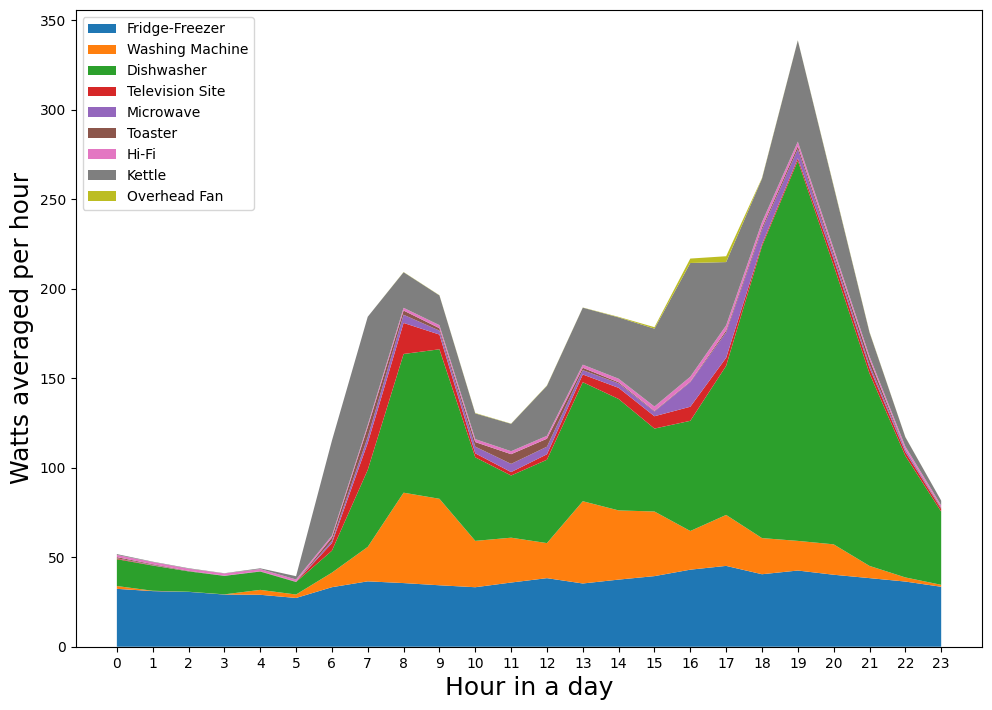

In [4]:
# Set size of plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
# Stackplot
ax.stackplot(list(range(24)), np.transpose(by_hours_df.values), labels=by_hours_df.columns.values)
plt.xlabel('Hour in a day', fontsize=18)
plt.ylabel('Watts averaged per hour', fontsize=18)
plt.xticks(np.arange(0, 24, 1.0))
ax.legend(loc=2)

/tmp/ipykernel_73665/571442566.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(241)


Text(0.5, 1.0, 'Kettle')

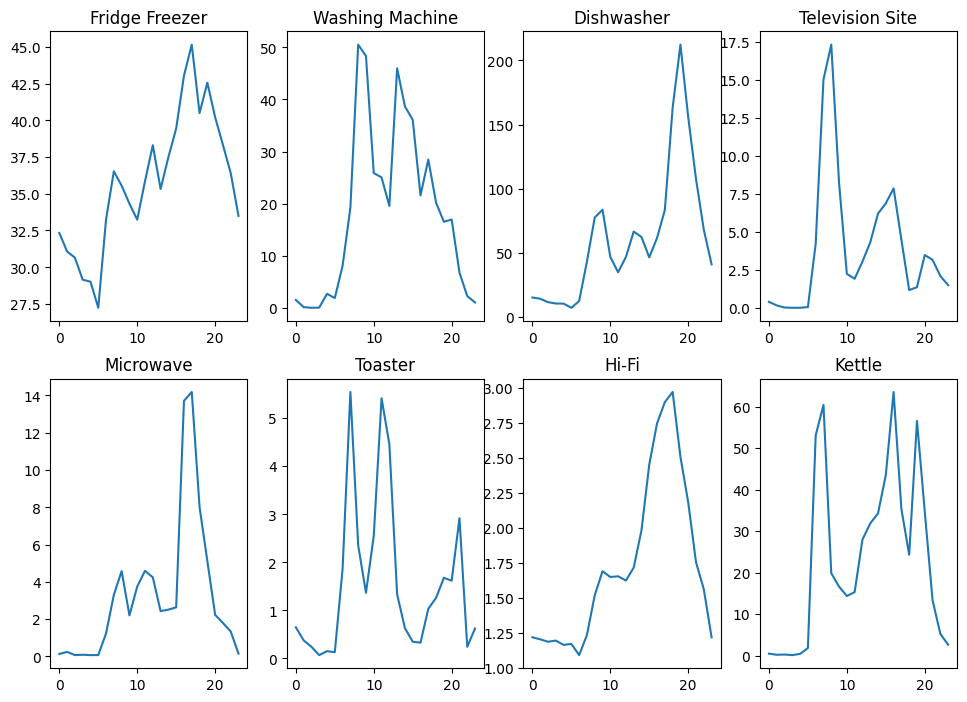

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.subplot(241)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Fridge-Freezer'].values)
plt.title('Fridge Freezer')

plt.subplot(242)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Washing Machine'].values)
plt.title('Washing Machine')

plt.subplot(243)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Dishwasher'].values)
plt.title('Dishwasher')

plt.subplot(244)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Television Site'].values)
plt.title('Television Site')

plt.subplot(245)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Microwave'].values)
plt.title('Microwave')

plt.subplot(246)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Toaster'].values)
plt.title('Toaster')

plt.subplot(247)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Hi-Fi'].values)
plt.title('Hi-Fi')

plt.subplot(248)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Kettle'].values)
plt.title('Kettle')

In [6]:
# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5733526 entries, 2013-09-17 22:08:11 to 2015-05-28 08:05:43
Data columns (total 11 columns):
 #   Column      Dtype
---  ------      -----
 0   Unix        int64
 1   Aggregate   int64
 2   Appliance1  int64
 3   Appliance2  int64
 4   Appliance3  int64
 5   Appliance4  int64
 6   Appliance5  int64
 7   Appliance6  int64
 8   Appliance7  int64
 9   Appliance8  int64
 10  Appliance9  int64
dtypes: int64(11)
memory usage: 524.9 MB
None

Basic Statistics:
               Unix     Aggregate    Appliance1    Appliance2    Appliance3   
count  5.733526e+06  5.733526e+06  5.733526e+06  5.733526e+06  5.733526e+06  \
mean   1.409809e+09  4.651023e+02  3.576811e+01  1.826877e+01  6.154452e+01   
std    1.401948e+07  1.062579e+03  4.565278e+01  1.743028e+02  3.523295e+02   
min    1.379456e+09  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.399690e+09  1.080000e+02  1.000000e+00  0.000000e+00  0.000000e+00   
5

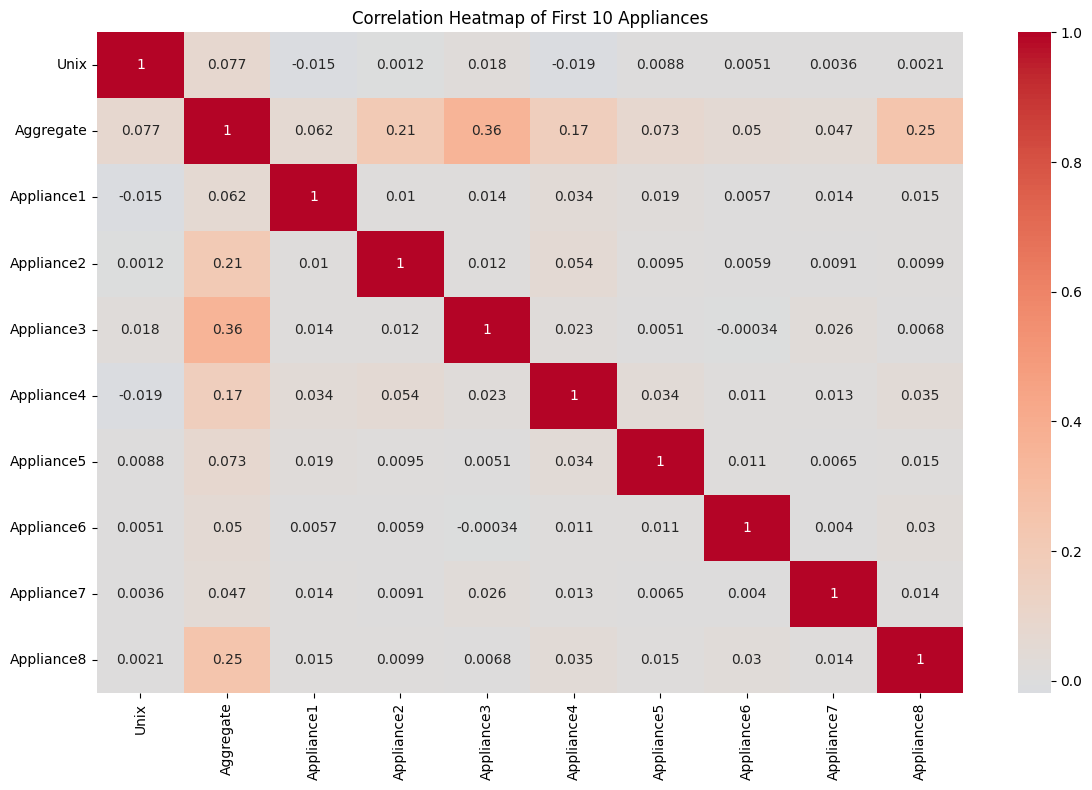

In [8]:
# Correlation heatmap of the first 10 appliances
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:, :10].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of First 10 Appliances')
plt.tight_layout()
plt.show()

## analyze daily patterns

<Figure size 1500x800 with 0 Axes>

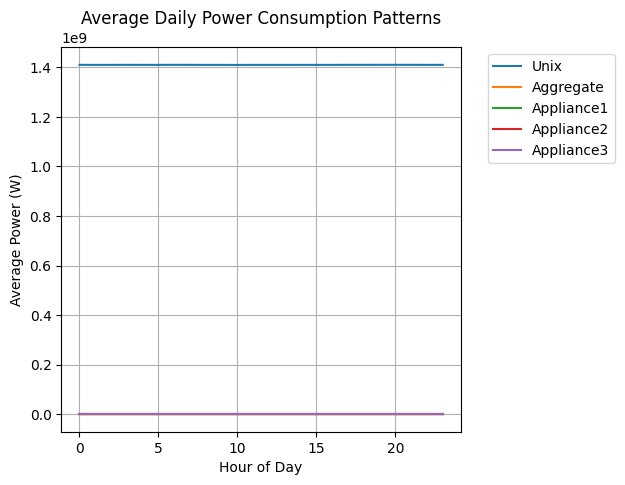

In [9]:
# Add hour column for daily analysis
df['hour'] = df.index.hour

# Calculate daily average consumption for each appliance
daily_avg = df.groupby('hour').mean()

# Plot daily patterns for first 5 appliances
plt.figure(figsize=(15, 8))
daily_avg.iloc[:, :5].plot()
plt.title('Average Daily Power Consumption Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (W)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## analyze weekly patterns:

<Figure size 1500x800 with 0 Axes>

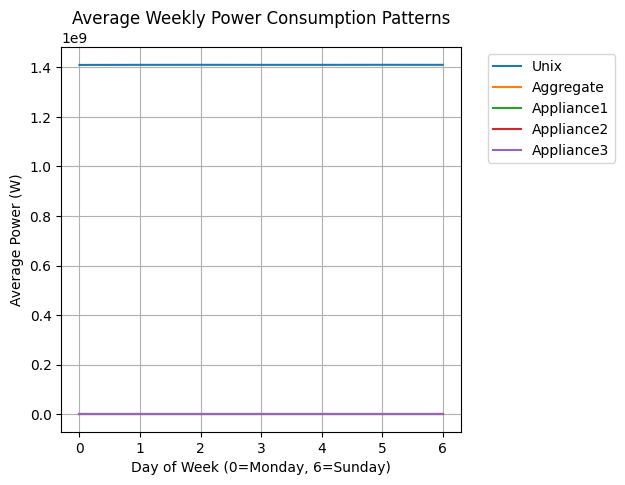

In [10]:
# Add day of week column
df['day_of_week'] = df.index.dayofweek

# Calculate weekly average consumption
weekly_avg = df.groupby('day_of_week').mean()

# Plot weekly patterns for first 5 appliances
plt.figure(figsize=(15, 8))
weekly_avg.iloc[:, :5].plot()
plt.title('Average Weekly Power Consumption Patterns')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Power (W)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## analyze peak usage times:

In [11]:
# Find peak usage times for each appliance
peak_times = df.iloc[:, :10].idxmax()

# Create a summary of peak times
peak_summary = pd.DataFrame({
    'Appliance': df.iloc[:, :10].columns,
    'Peak Time': peak_times,
    'Peak Power (W)': df.iloc[:, :10].max()
})

print("Peak Usage Times and Power:")
print(peak_summary)

Peak Usage Times and Power:
             Appliance           Peak Time  Peak Power (W)
Unix              Unix 2015-05-28 08:05:43      1432800343
Aggregate    Aggregate 2014-05-28 08:23:20           24595
Appliance1  Appliance1 2014-04-05 07:17:12            1690
Appliance2  Appliance2 2015-01-18 14:20:04            3584
Appliance3  Appliance3 2015-05-09 10:02:44            3092
Appliance4  Appliance4 2015-02-18 09:48:01            3584
Appliance5  Appliance5 2014-12-01 09:02:57            3072
Appliance6  Appliance6 2014-12-23 10:28:21            3968
Appliance7  Appliance7 2015-05-20 16:39:00            3040
Appliance8  Appliance8 2015-03-02 07:31:10            3729


## analyze energy consumption distribution:

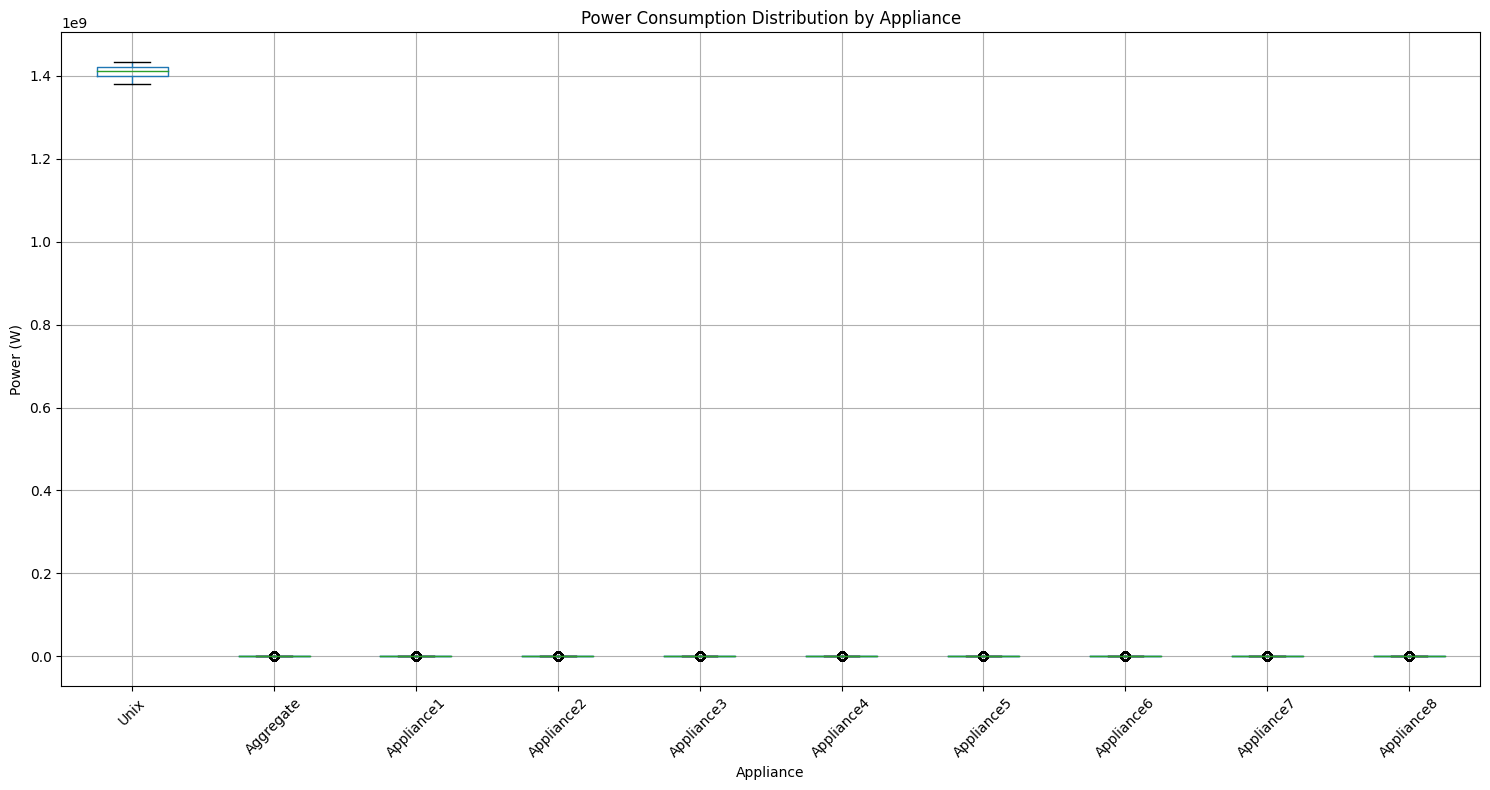

In [12]:
# Create box plots for first 10 appliances
plt.figure(figsize=(15, 8))
df.iloc[:, :10].boxplot()
plt.title('Power Consumption Distribution by Appliance')
plt.xlabel('Appliance')
plt.ylabel('Power (W)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## analyze appliance usage patterns

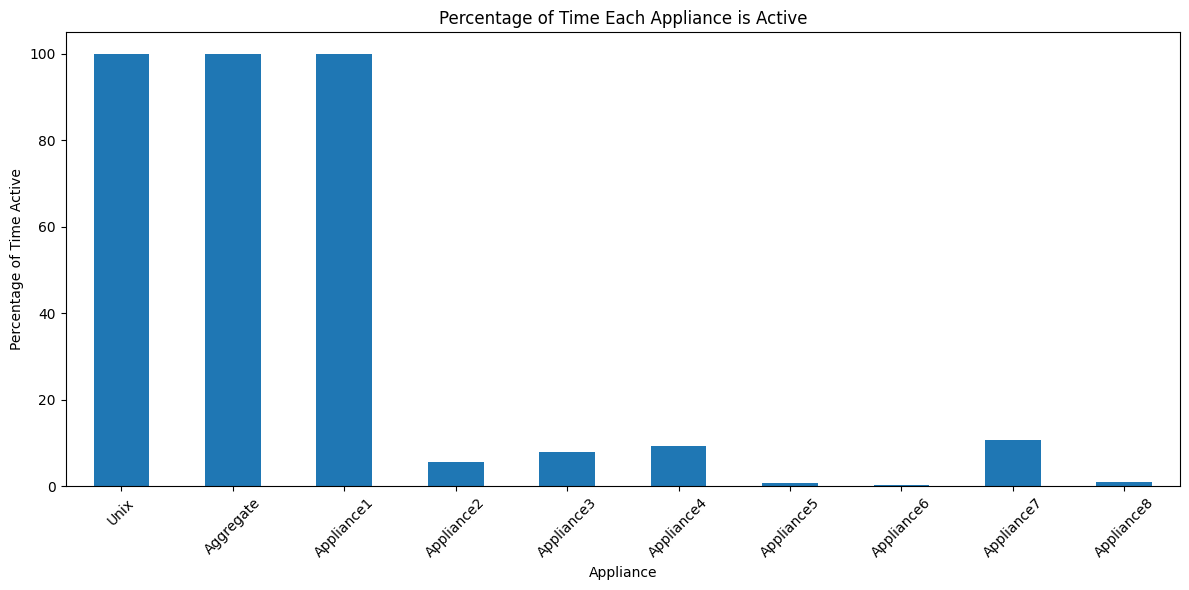

In [13]:
# Calculate percentage of time each appliance is active (power > 0)
active_percentage = (df.iloc[:, :10] > 0).mean() * 100

# Create a bar plot of active percentages
plt.figure(figsize=(12, 6))
active_percentage.plot(kind='bar')
plt.title('Percentage of Time Each Appliance is Active')
plt.xlabel('Appliance')
plt.ylabel('Percentage of Time Active')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## analyze energy consumption patterns:

<Figure size 1500x800 with 0 Axes>

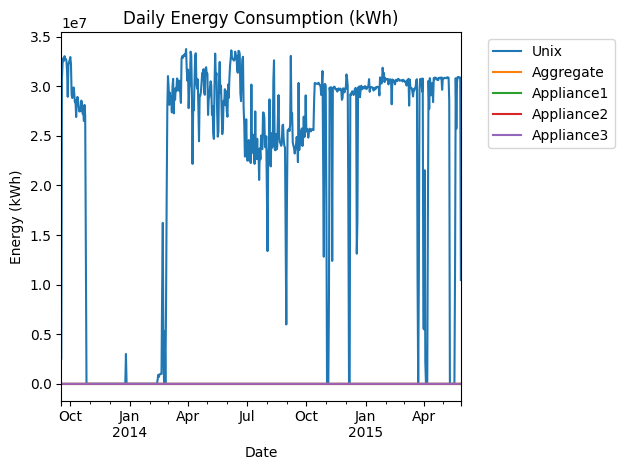

In [14]:
# Calculate total energy consumption (kWh) for each appliance
# Assuming 6-second sampling rate
sampling_rate = 6  # seconds
energy_consumption = df.iloc[:, :10] * (sampling_rate / 3600) / 1000  # Convert to kWh

# Calculate daily energy consumption
daily_energy = energy_consumption.resample('D').sum()

# Plot daily energy consumption for first 5 appliances
plt.figure(figsize=(15, 8))
daily_energy.iloc[:, :5].plot()
plt.title('Daily Energy Consumption (kWh)')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## analyze appliance combinations

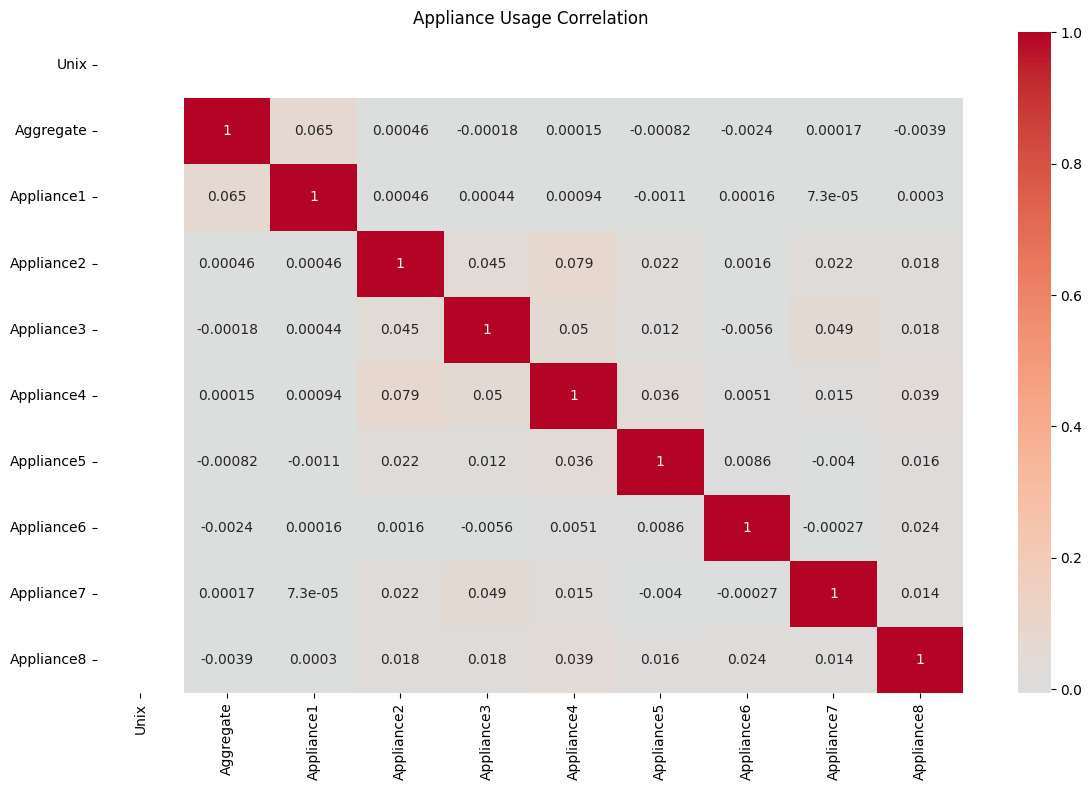

In [15]:
# Find appliances that are commonly used together
# Create a binary matrix of appliance states
appliance_states = (df.iloc[:, :10] > 0).astype(int)

# Calculate correlation between appliance states
state_correlation = appliance_states.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(state_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Appliance Usage Correlation')
plt.tight_layout()
plt.show()

## analyze seasonal patterns:

<Figure size 1500x800 with 0 Axes>

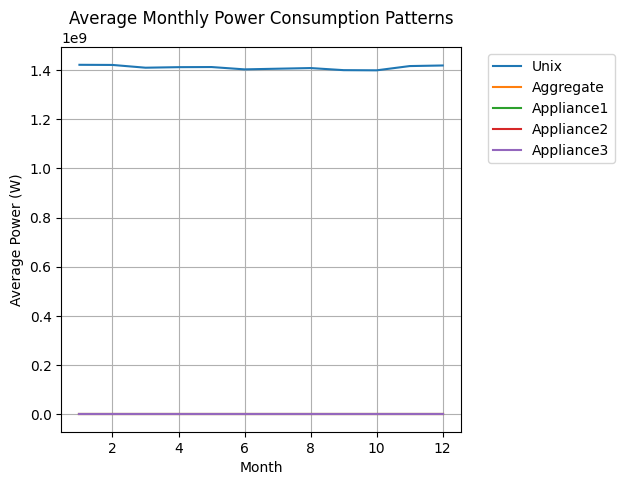

In [16]:
# Add month column
df['month'] = df.index.month

# Calculate monthly average consumption
monthly_avg = df.groupby('month').mean()

# Plot monthly patterns for first 5 appliances
plt.figure(figsize=(15, 8))
monthly_avg.iloc[:, :5].plot()
plt.title('Average Monthly Power Consumption Patterns')
plt.xlabel('Month')
plt.ylabel('Average Power (W)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##  analyze power consumption statistics:

In [17]:
# Calculate detailed statistics for each appliance
stats_summary = pd.DataFrame({
    'Mean (W)': df.iloc[:, :10].mean(),
    'Median (W)': df.iloc[:, :10].median(),
    'Std Dev (W)': df.iloc[:, :10].std(),
    'Max (W)': df.iloc[:, :10].max(),
    'Min (W)': df.iloc[:, :10].min(),
    'Skewness': df.iloc[:, :10].skew(),
    'Kurtosis': df.iloc[:, :10].kurtosis()
})

print("Detailed Power Consumption Statistics:")
print(stats_summary)

Detailed Power Consumption Statistics:
                Mean (W)    Median (W)   Std Dev (W)     Max (W)     Min (W)   
Unix        1.409809e+09  1.410659e+09  1.401948e+07  1432800343  1379455691  \
Aggregate   4.651023e+02  1.680000e+02  1.062579e+03       24595           0   
Appliance1  3.576811e+01  1.000000e+00  4.565278e+01        1690           0   
Appliance2  1.826877e+01  0.000000e+00  1.743028e+02        3584           0   
Appliance3  6.154452e+01  0.000000e+00  3.523295e+02        3092           0   
Appliance4  3.965859e+00  0.000000e+00  1.338795e+01        3584           0   
Appliance5  3.277610e+00  0.000000e+00  5.863865e+01        3072           0   
Appliance6  1.549044e+00  0.000000e+00  3.799969e+01        3968           0   
Appliance7  1.733205e+00  0.000000e+00  5.694687e+00        3040           0   
Appliance8  2.315502e+01  0.000000e+00  2.494471e+02        3729           0   

             Skewness      Kurtosis  
Unix        -0.373682     -0.630855  
Aggr

#  **Advanced analysis:**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [20]:
def prepare_data_for_modeling(df, target_appliance, input_appliances):
    """
    Prepare data for modeling by selecting features and target
    """
    # Select features and target
    X = df[input_appliances]
    y = df[target_appliance]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

## evaluate multiple models

In [21]:
def evaluate_models(X_train, X_test, y_train, y_test):
    """
    Train and evaluate multiple models
    """
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBRegressor(random_state=42)
    }
    
    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'RMSE': rmse,
            'R2': r2
        }
        
        print(f"\n{name} Results:")
        print(f"RMSE: {rmse:.2f}")
        print(f"R2 Score: {r2:.4f}")
        
        # Plot actual vs predicted
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel('Actual Power (W)')
        plt.ylabel('Predicted Power (W)')
        plt.title(f'{name} - Actual vs Predicted')
        plt.tight_layout()
        plt.show()
    
    return results

## analyze appliance dependencies:

In [22]:
def analyze_appliance_dependencies(df, target_appliance, input_appliances):
    """
    Analyze dependencies between appliances using correlation and feature importance
    """
    # Prepare data
    X = df[input_appliances]
    y = df[target_appliance]
    
    # Train Random Forest to get feature importance
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Get feature importance
    importance = pd.DataFrame({
        'feature': input_appliances,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance)
    plt.title(f'Feature Importance for {target_appliance}')
    plt.tight_layout()
    plt.show()
    
    return importance

## Function for time-based analysis:

In [23]:
def analyze_time_patterns(df, appliance):
    """
    Analyze time-based patterns for a specific appliance
    """
    # Add time-based features
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    
    # Calculate average consumption by hour
    hourly_avg = df.groupby('hour')[appliance].mean()
    
    # Calculate average consumption by day of week
    daily_avg = df.groupby('day_of_week')[appliance].mean()
    
    # Calculate average consumption by month
    monthly_avg = df.groupby('month')[appliance].mean()
    
    # Plot patterns
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
    
    hourly_avg.plot(ax=ax1)
    ax1.set_title(f'Hourly Average Power Consumption - {appliance}')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Average Power (W)')
    
    daily_avg.plot(ax=ax2)
    ax2.set_title(f'Daily Average Power Consumption - {appliance}')
    ax2.set_xlabel('Day of Week')
    ax2.set_ylabel('Average Power (W)')
    
    monthly_avg.plot(ax=ax3)
    ax3.set_title(f'Monthly Average Power Consumption - {appliance}')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Average Power (W)')
    
    plt.tight_layout()
    plt.show()

## implement anomaly detection

In [24]:
def detect_anomalies(df, appliance, threshold=3):
    """
    Detect anomalies in appliance power consumption
    """
    # Calculate z-scores
    z_scores = stats.zscore(df[appliance])
    
    # Find anomalies
    anomalies = np.abs(z_scores) > threshold
    
    # Plot anomalies
    plt.figure(figsize=(15, 8))
    plt.plot(df.index, df[appliance], 'b-', label='Normal')
    plt.scatter(df.index[anomalies], df[appliance][anomalies], 
                color='red', label='Anomaly')
    plt.title(f'Anomaly Detection for {appliance}')
    plt.xlabel('Time')
    plt.ylabel('Power (W)')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Print anomaly statistics
    anomaly_percentage = (anomalies.sum() / len(df)) * 100
    print(f"\nAnomaly Statistics for {appliance}:")
    print(f"Total anomalies: {anomalies.sum()}")
    print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")


Linear Regression Results:
RMSE: 13967270.07
R2 Score: 0.0074


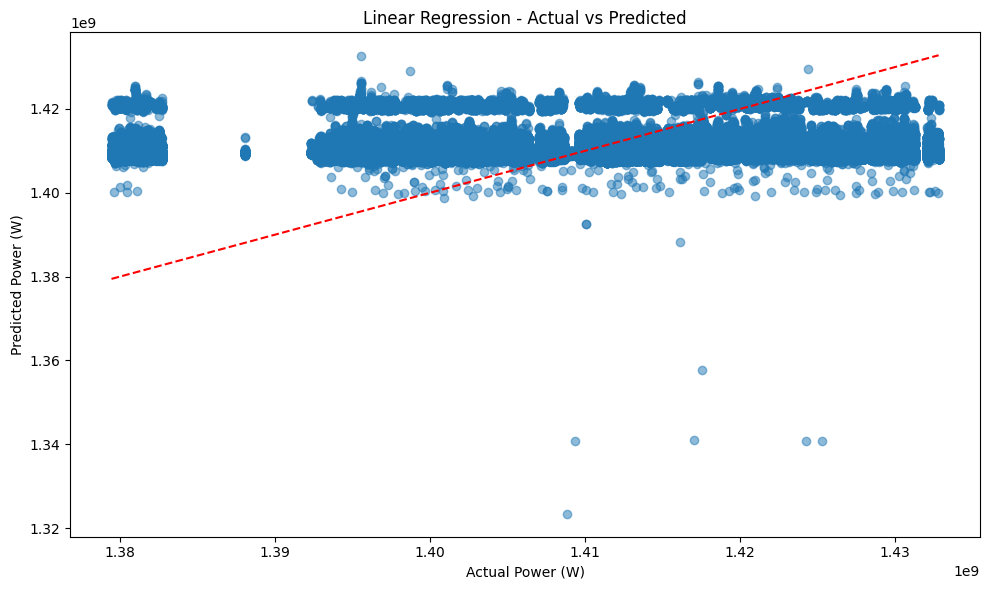


Ridge Regression Results:
RMSE: 13967270.07
R2 Score: 0.0074


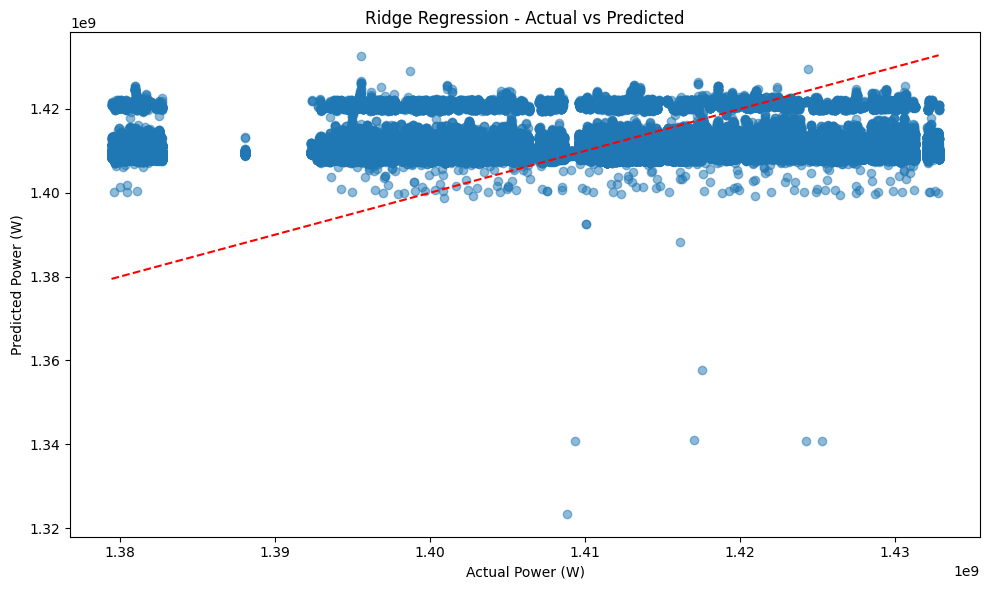


Lasso Regression Results:
RMSE: 13967270.07
R2 Score: 0.0074


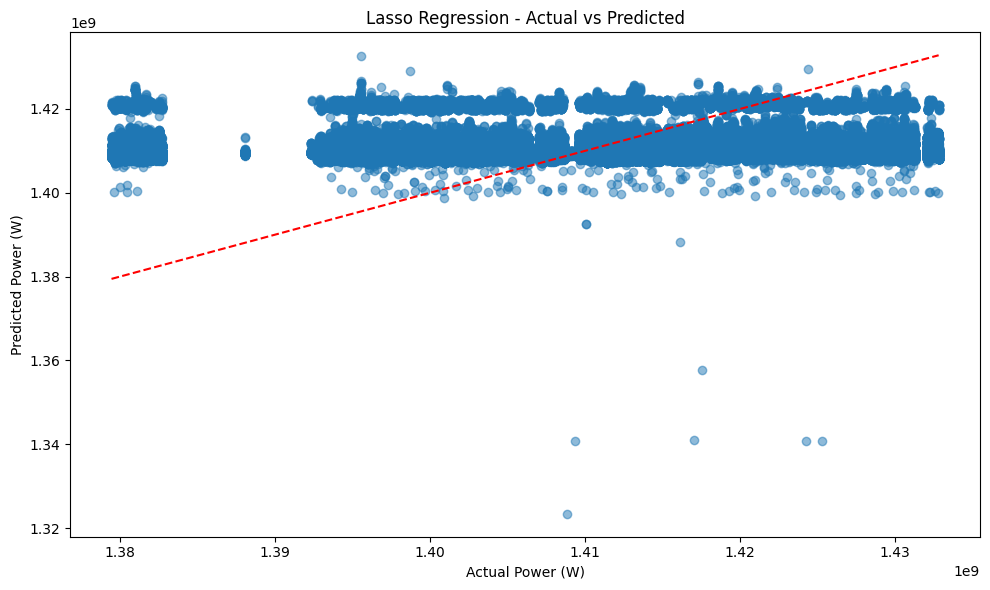

In [ ]:
# Example usage
# Select target appliance and input appliances
target_appliance = df.columns[0]  # First appliance
input_appliances = df.columns[1:6]  # Next 5 appliances

# Prepare data for modeling
X_train, X_test, y_train, y_test = prepare_data_for_modeling(
    df, target_appliance, input_appliances
)

# Evaluate models
results = evaluate_models(X_train, X_test, y_train, y_test)

# Analyze dependencies
importance = analyze_appliance_dependencies(df, target_appliance, input_appliances)

# Analyze time patterns
analyze_time_patterns(df, target_appliance)

# Detect anomalies
detect_anomalies(df, target_appliance)